In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
Roots,Weights = np.polynomial.legendre.leggauss(20)

def Integral(f,x,y,z,R=0.5,a=0.,b=2*np.pi):
    
    phi = 0.5*( (b-a)*Roots + a + b  )

    return 0.5*(b-a)*np.sum( Weights*f(phi,x,y,z,R) )

In [3]:
def GetEx(phi,x,y,z,R):
    
    d = (x**2 + y**2 + z**2 + R**2 - 2*R*x*np.cos(phi) - 2*R*y*np.sin(phi))**(3/2)
    
    f = (x-R*np.cos(phi))/(2*np.pi*d)
    
    return f

In [4]:
def GetEy(phi,x,y,z,R):
    
    d = (x**2 + y**2 + z**2 + R**2 - 2*R*x*np.cos(phi) - 2*R*y*np.sin(phi))**(3/2)
    
    f = (y-R*np.sin(phi))/(2*np.pi*d)
    
    return f

In [5]:
def GetEz(phi,x,y,z,R):
    
    d = (x**2 + y**2 + z**2 + R**2 - 2*R*x*np.cos(phi) - 2*R*y*np.sin(phi))**(3/2)
    
    f = (z)/(2*np.pi*d)
    
    return f

In [6]:
print(Integral(GetEx,0.6,0.6,1.),Integral(GetEy,0.6,0.6,1.),Integral(GetEz,0.6,0.6,1.))

0.21152494076724535 0.2115249406881854 0.4386473215993913


In [7]:
N = 6
x = np.linspace(-0.6,0.6,N)
y = np.linspace(-0.6,0.6,N)
z = np.linspace(-0.6,0.6,N)
X,Y,Z = np.meshgrid(x,y,z)

In [8]:
x

array([-0.6 , -0.36, -0.12,  0.12,  0.36,  0.6 ])

In [9]:
Ex = np.zeros((N,N,N))
Ey = np.zeros((N,N,N))
Ez = np.zeros((N,N,N))

In [10]:
for i,_x in enumerate(x):
    for j,_y in enumerate(y):
        for k, _z in enumerate(z):
            Ex[i,j,k] = Integral(GetEx,_x,_y,_z)
            Ey[i,j,k] = Integral(GetEy,_x,_y,_z)
            Ez[i,j,k] = Integral(GetEz,_x,_y,_z)

In [11]:
map1_ = np.round(Ex[:,:,-1],5)
print(map1_)

[[-0.44648 -0.53805 -0.57663 -0.57663 -0.53805 -0.44648]
 [-0.32283 -0.35779 -0.34807 -0.34807 -0.35779 -0.32283]
 [-0.11532 -0.11602 -0.10229 -0.10229 -0.11602 -0.11532]
 [ 0.11533  0.11602  0.10229  0.10229  0.11602  0.11533]
 [ 0.32283  0.35779  0.34807  0.34807  0.35779  0.32283]
 [ 0.44649  0.53804  0.57663  0.57663  0.53804  0.44649]]


In [12]:
map2_ = np.round(Ey[:,:,-1],5)
print(map2_)

[[-0.44649 -0.32282 -0.11532  0.11532  0.32282  0.44649]
 [-0.53804 -0.35779 -0.11602  0.11602  0.35779  0.53804]
 [-0.57663 -0.34807 -0.10229  0.10229  0.34807  0.57663]
 [-0.57663 -0.34807 -0.10229  0.10229  0.34807  0.57663]
 [-0.53804 -0.35779 -0.11602  0.11602  0.35779  0.53804]
 [-0.44649 -0.32283 -0.11533  0.11533  0.32283  0.44649]]


<IPython.core.display.Javascript object>


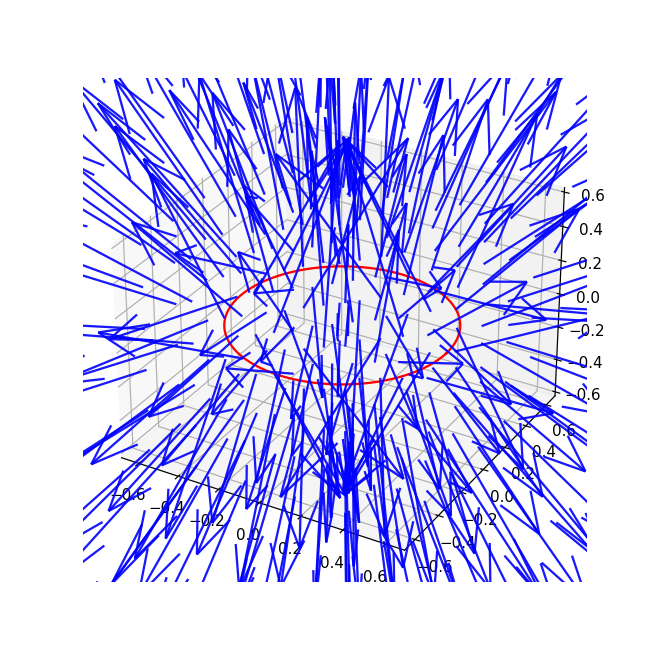

In [13]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1,projection='3d')


t = np.linspace(0,2*np.pi,100)
ax.plot(0.5*np.cos(t),0.5*np.sin(t),color='r')

for i,_x in enumerate(x):
    for j,_y in enumerate(y):
        for k, _z in enumerate(z):
            if _z == 0.:
                print(_x,_y,_z,Ex[i,j,k],Ey[i,j,k],Ez[i,j,k])
            if _z != 0:
                ax.quiver(_x,_y,_z,Ex[i,j,k],Ey[i,j,k],Ez[i,j,k],color='b',alpha=0.9,normalize=True)

#ax.scatter(X,Y,Z)
#plt.savefig('CampoAnillo.pdf')